# Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# Set visualization styles for better-looking plots

In [5]:
plt.style.use('ggplot')  # Use ggplot style for a more professional look
sns.set_palette('Set2')  # Set a color palette for consistent colors
# %matplotlib inline  # Display plots directly in the notebook

# 1. DATA LOADING AND INITIAL EXPLORATION

In [6]:
# Load the breast cancer dataset from the shared GitHub repository
url = "https://raw.githubusercontent.com/abdelDebug/Breast-Cancer-Dataset/main/breast_cancer_dataset.csv"
df = pd.read_csv(url)  # Read the CSV file into a pandas DataFrame

# Display basic information about the dataset

In [7]:
print("\nDataset shape:", df.shape)  # Shows number of rows and columns
print("\nFirst 5 rows:")  # Preview the first few rows to understand the data structure
display(df.head())

# Check data types and identify any missing values
print("\nDataset info:")
print(df.info())  # Shows column names, data types, and non-null values

print("\nMissing values per column:")
print(df.isnull().sum())  # Count missing values in each column


Dataset shape: (569, 32)

First 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_s

# 2. DATA EXPLORATION

2. DATA EXPLORATION

2.1 Target Variable Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64
Percentage of Malignant: 37.26%
Percentage of Benign: 62.74%


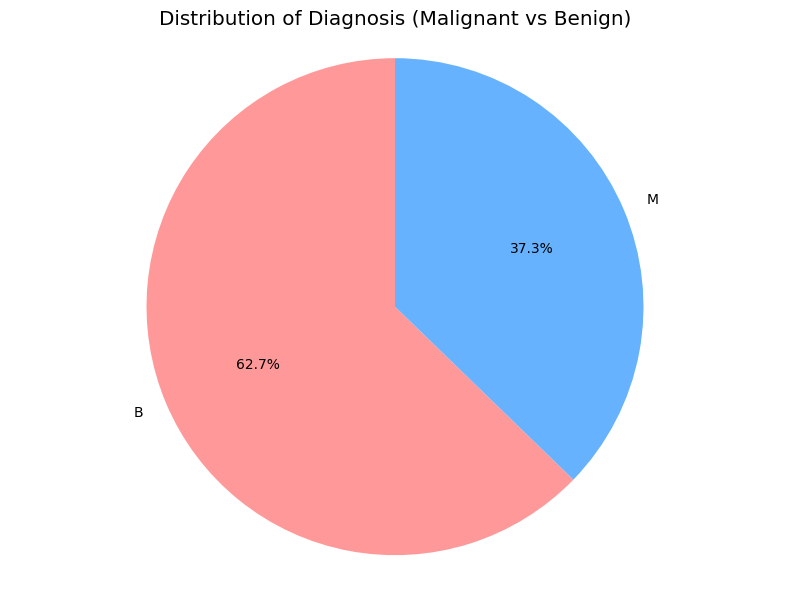


2.2 Comprehensive Descriptive Statistics:

Key statistics for each feature:


,mean,median,std,min,max
id,3.037183e+07,906024.000000,1.250206e+08,8670.000000,9.113205e+08
radius_mean,1.412729e+01,13.370000,3.524049e+00,6.981000,2.811000e+01
texture_mean,1.928965e+01,18.840000,4.301036e+00,9.710000,3.928000e+01
perimeter_mean,9.196903e+01,86.240000,2.429898e+01,43.790000,1.885000e+02
area_mean,6.548891e+02,551.100000,3.519141e+02,143.500000,2.501000e+03
smoothness_mean,9.636028e-02,0.095870,1.406413e-02,0.052630,1.634000e-01
compactness_mean,1.043410e-01,0.092630,5.281276e-02,0.019380,3.454000e-01
concavity_mean,8.879932e-02,0.061540,7.971981e-02,0.000000,4.268000e-01
concave points_mean,4.891915e-02,0.033500,3.880284e-02,0.000000,2.012000e-01
symmetry_mean,1.811619e-01,0.179200,2.741428e-02,0.106000,3.040000e-01



Skewness analysis (comparing mean and median):


,mean,median,difference,skewness
id,3.037183e+07,906024.000000,2.946581e+07,0.235688
radius_mean,1.412729e+01,13.370000,7.572917e-01,0.214893
texture_mean,1.928965e+01,18.840000,4.496485e-01,0.104544
perimeter_mean,9.196903e+01,86.240000,5.729033e+00,0.235773
area_mean,6.548891e+02,551.100000,1.037891e+02,0.294927
smoothness_mean,9.636028e-02,0.095870,4.902812e-04,0.034860
compactness_mean,1.043410e-01,0.092630,1.171098e-02,0.221745
concavity_mean,8.879932e-02,0.061540,2.725932e-02,0.341939
concave points_mean,4.891915e-02,0.033500,1.541915e-02,0.397372
symmetry_mean,1.811619e-01,0.179200,1.961863e-03,0.071564



Variability analysis (coefficient of variation):


,mean,std,cv
id,3.037183e+07,1.250206e+08,411.633345
area_se,4.033708e+01,4.549101e+01,112.777143
concavity_se,3.189372e-02,3.018606e-02,94.645792
concavity_mean,8.879932e-02,7.971981e-02,89.775251
concave points_mean,4.891915e-02,3.880284e-02,79.320365
concavity_worst,2.721885e-01,2.086243e-01,76.646990
perimeter_se,2.866059e+00,2.021855e+00,70.544758
compactness_se,2.547814e-02,1.790818e-02,70.288413
fractal_dimension_se,3.794904e-03,2.646071e-03,69.726956
radius_se,4.051721e-01,2.773127e-01,68.443203


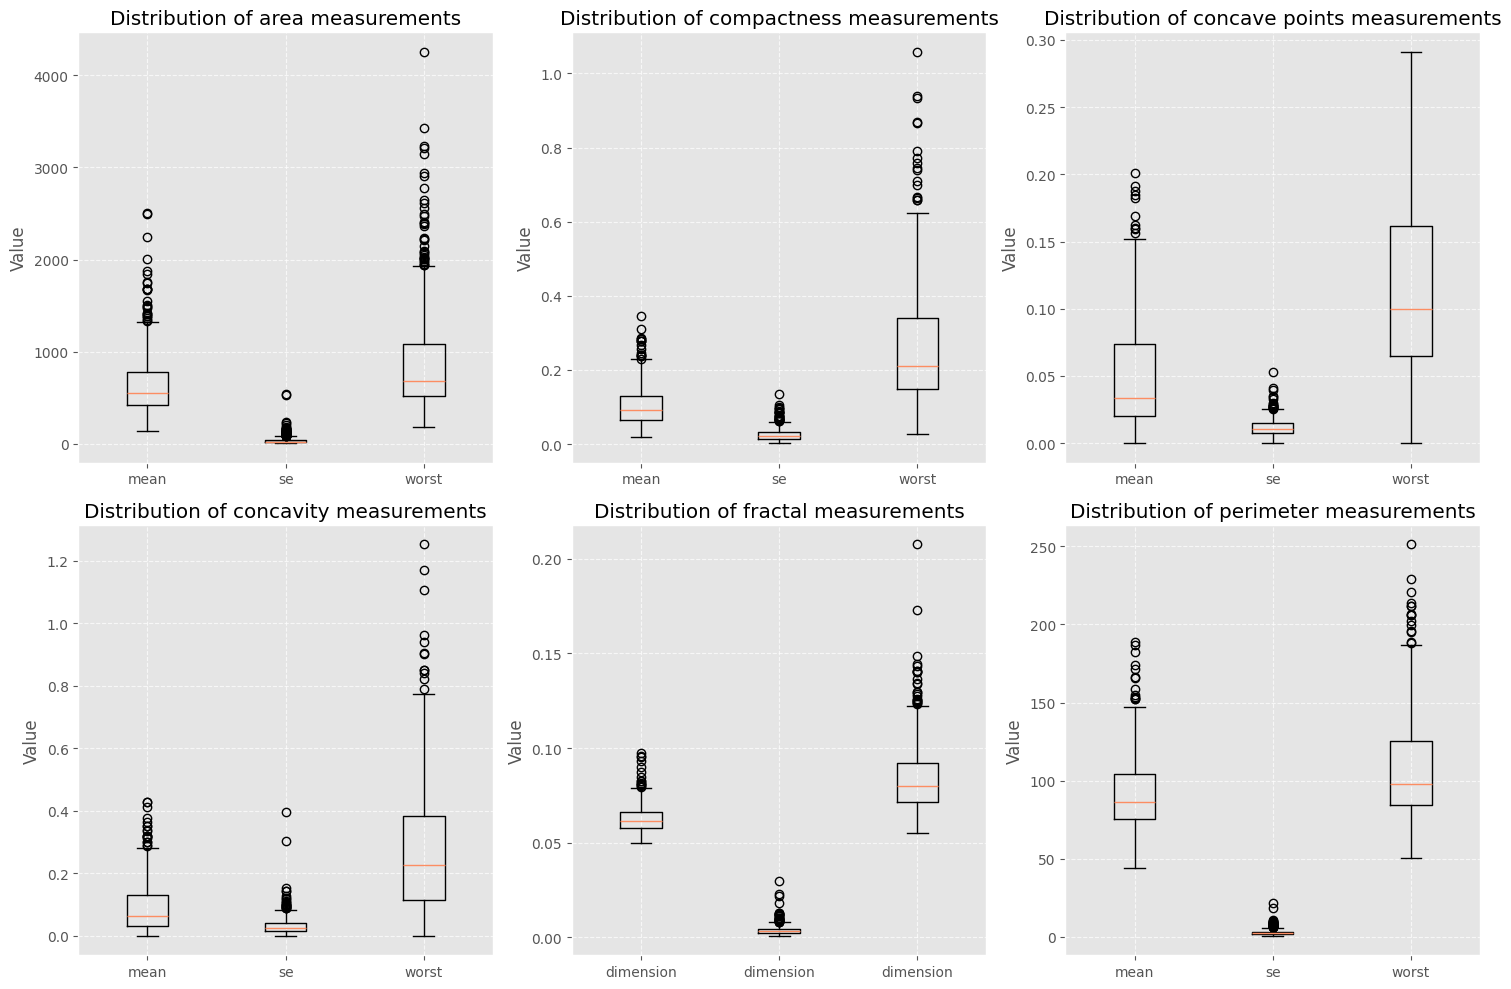


Comparison of statistics between malignant and benign tumors:

Statistics for radius_mean:


,mean,median,std
diagnosis,,,
B,12.146524,12.200,1.780512
M,17.462830,17.325,3.203971


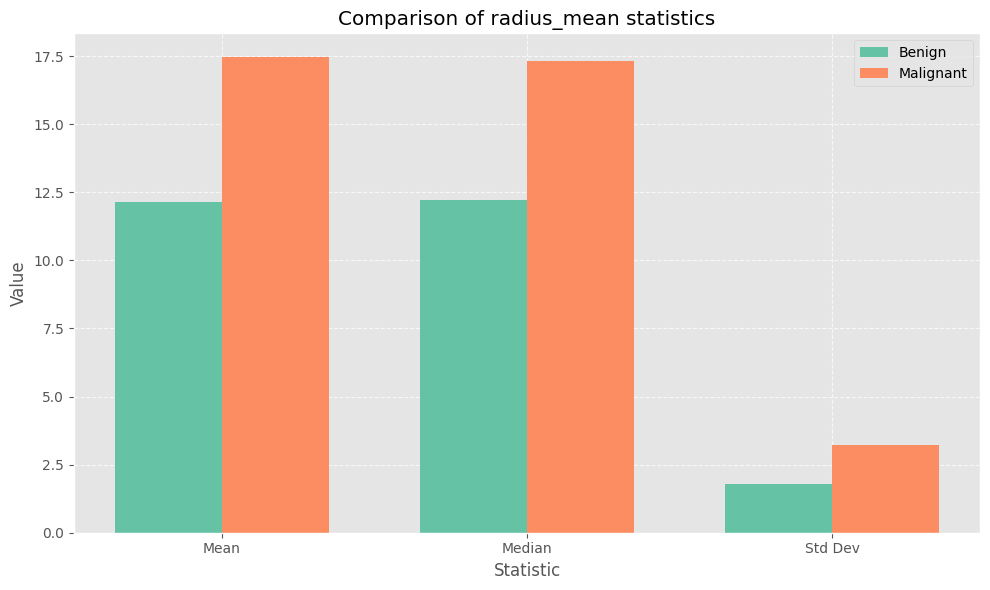


Statistics for texture_mean:


,mean,median,std
diagnosis,,,
B,17.914762,17.39,3.995125
M,21.604906,21.46,3.779470


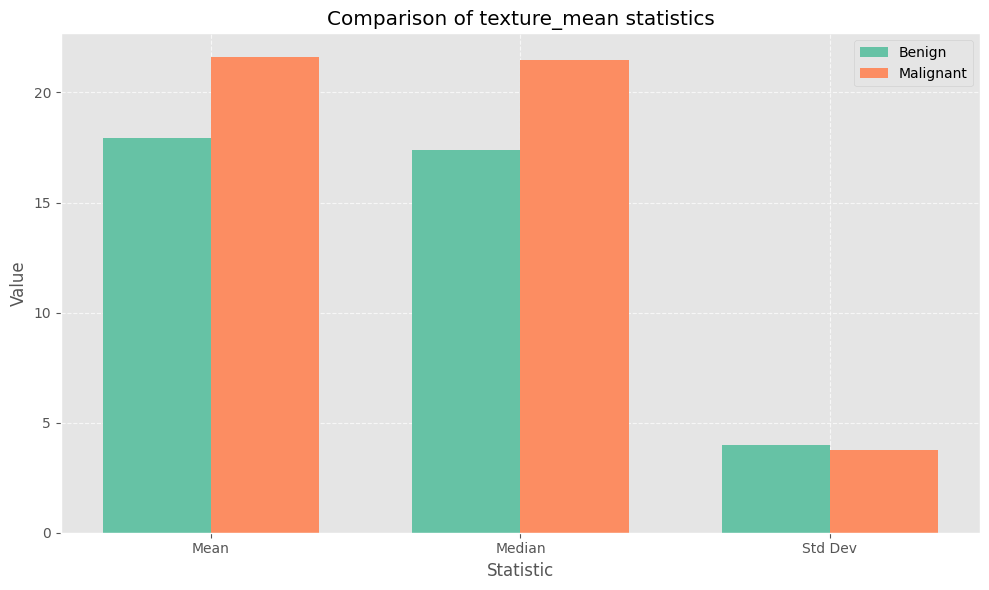


Statistics for perimeter_mean:


,mean,median,std
diagnosis,,,
B,78.075406,78.18,11.807438
M,115.365377,114.20,21.854653


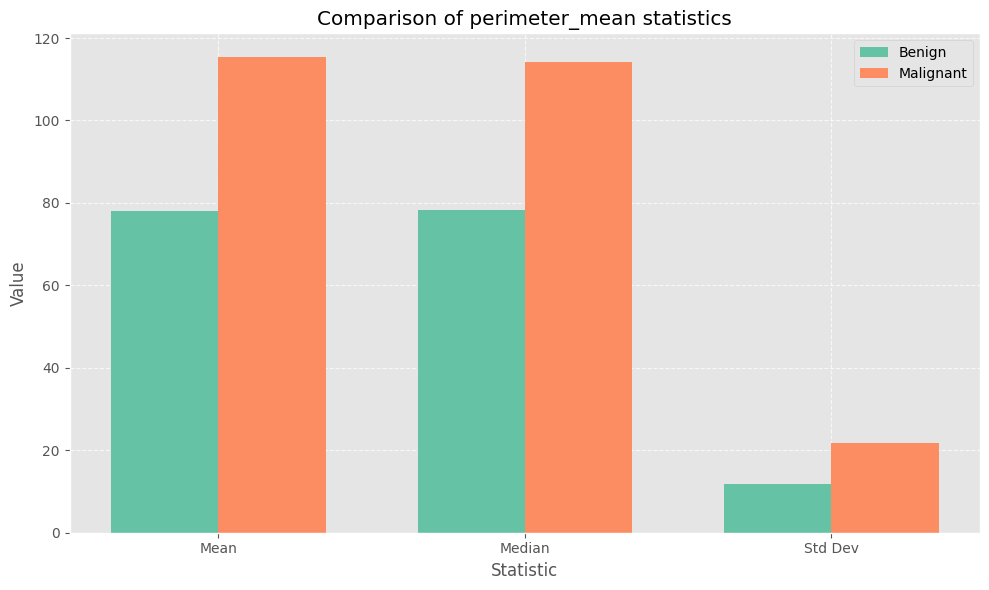


Statistics for area_mean:


,mean,median,std
diagnosis,,,
B,462.790196,458.4,134.287118
M,978.376415,932.0,367.937978


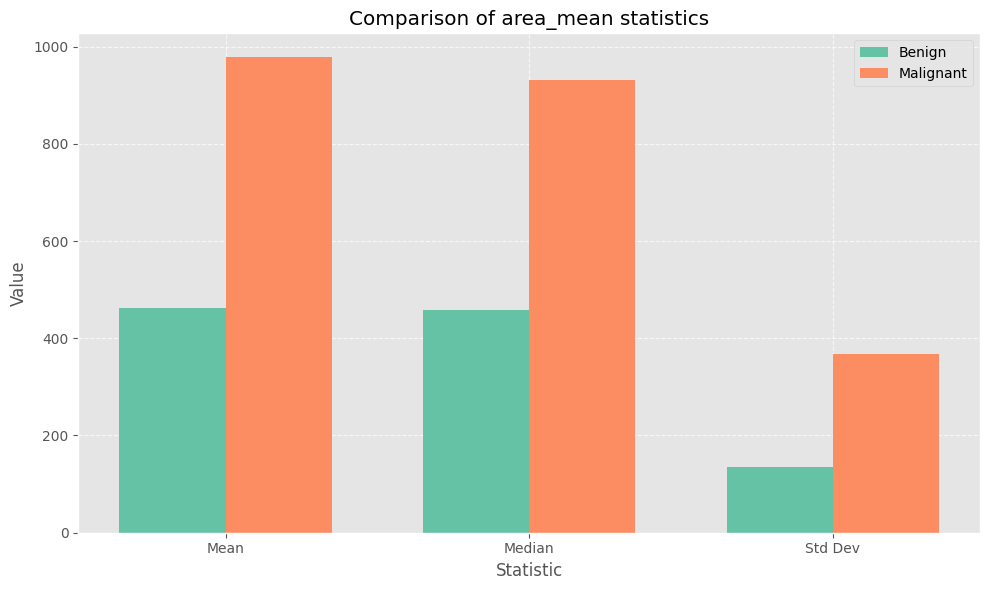


Statistics for smoothness_mean:


,mean,median,std
diagnosis,,,
B,0.092478,0.09076,0.013446
M,0.102898,0.10220,0.012608


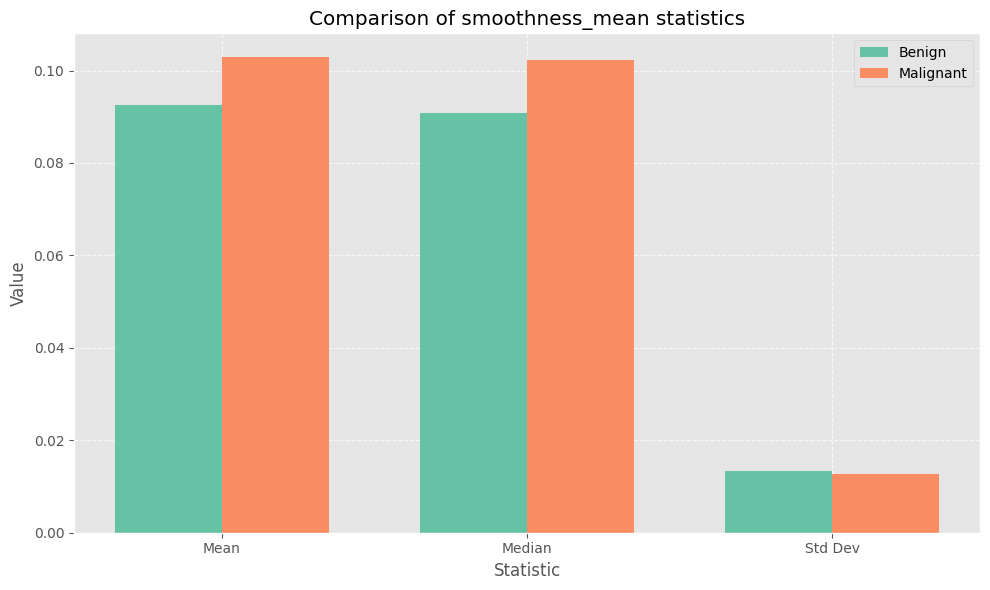


Statistics for concavity_mean:


,mean,median,std
diagnosis,,,
B,0.046058,0.03709,0.043442
M,0.160775,0.15135,0.075019


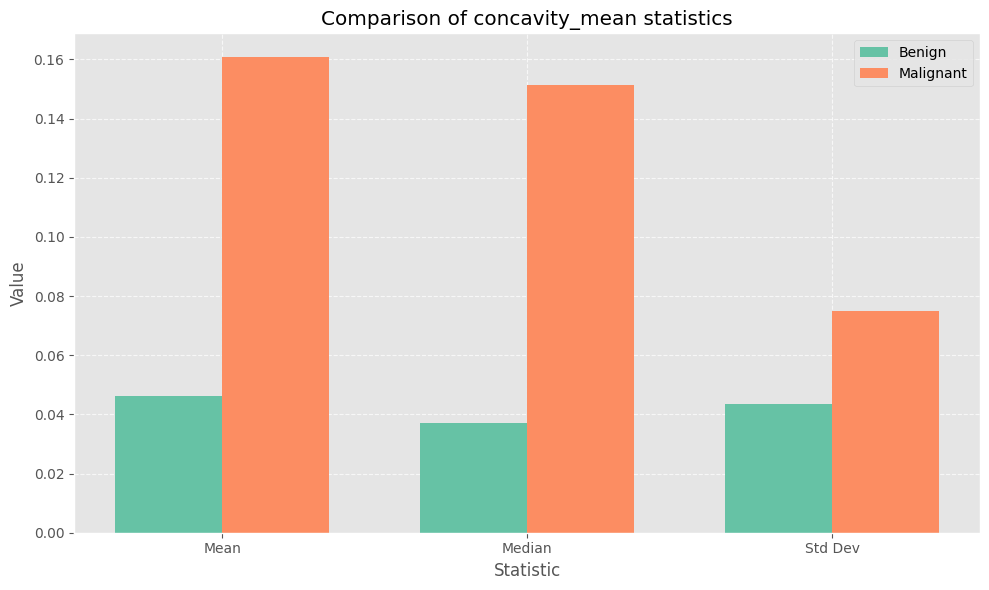

In [8]:
print("2. DATA EXPLORATION")

# 2.1 Target variable distribution - Understanding class balance
print("\n2.1 Target Variable Distribution:")
target_counts = df['diagnosis'].value_counts()  # Count M (Malignant) and B (Benign) cases
print(target_counts)
# Calculate percentages to understand class balance
print(f"Percentage of Malignant: {100 * target_counts['M'] / len(df):.2f}%")
print(f"Percentage of Benign: {100 * target_counts['B'] / len(df):.2f}%")

# Create a pie chart to visualize the class distribution
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#FF9999', '#66B2FF'])  # Red for Malignant, Blue for Benign
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.tight_layout()
plt.show()

# 2.2 Enhanced Descriptive Statistics - Examining mean, median, standard deviation and more
print("\n2.2 Comprehensive Descriptive Statistics:")

# Get basic statistics for all features
stats_df = df.describe().T  # Transpose for better readability

# Add median explicitly (though it's already in describe() as 50%)
stats_df = stats_df.rename(columns={'50%': 'median'})

# Create a more focused view of key statistics
key_stats = stats_df[['mean', 'median', 'std', 'min', 'max']]
print("\nKey statistics for each feature:")
display(key_stats)

# Compare mean and median to check for skewness
skew_analysis = pd.DataFrame({
    'mean': stats_df['mean'],
    'median': stats_df['median'],
    'difference': stats_df['mean'] - stats_df['median'],
    'skewness': (stats_df['mean'] - stats_df['median'])/stats_df['std']
})
print("\nSkewness analysis (comparing mean and median):")
display(skew_analysis)

# Analyze coefficient of variation (CV) to compare relative variability
cv_analysis = pd.DataFrame({
    'mean': stats_df['mean'],
    'std': stats_df['std'],
    'cv': stats_df['std'] / stats_df['mean'] * 100  # CV as percentage
})
cv_analysis = cv_analysis.sort_values(by='cv', ascending=False)  # Sort by CV
print("\nVariability analysis (coefficient of variation):")
display(cv_analysis)

# Visualize the distribution of means and medians by feature type
# Group features by their base name (e.g., radius_mean, radius_se, radius_worst)
feature_base_names = sorted(list(set([col.split('_')[0] for col in df.columns if '_' in col])))

plt.figure(figsize=(15, 10))
for i, base_name in enumerate(feature_base_names[:6]):  # First 6 base features
    # Get columns with this base name
    cols = [col for col in df.columns if col.startswith(f"{base_name}_")]

    # Extract values for each column
    values = [df[col] for col in cols]
    labels = [col.split('_')[1] for col in cols]  # Extract suffix (mean, se, worst)

    plt.subplot(2, 3, i+1)
    plt.boxplot(values, labels=labels)
    plt.title(f'Distribution of {base_name} measurements')
    plt.ylabel('Value')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Compare mean, median and standard deviation between malignant and benign groups
print("\nComparison of statistics between malignant and benign tumors:")

# Group by diagnosis and calculate statistics
grouped_stats = df.groupby('diagnosis').agg(['mean', 'median', 'std'])

# Select a few important features for comparison
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
                      'area_mean', 'smoothness_mean', 'concavity_mean']

for feature in important_features:
    print(f"\nStatistics for {feature}:")
    display(grouped_stats[feature])

    # Visualize the comparison
    plt.figure(figsize=(10, 6))

    # Set x positions for bars
    x = np.arange(3)
    width = 0.35

    # Get values for benign and malignant
    b_values = grouped_stats.loc['B', feature].values
    m_values = grouped_stats.loc['M', feature].values

    # Create grouped bar chart
    plt.bar(x - width/2, b_values, width, label='Benign')
    plt.bar(x + width/2, m_values, width, label='Malignant')

    plt.xlabel('Statistic')
    plt.ylabel('Value')
    plt.title(f'Comparison of {feature} statistics')
    plt.xticks(x, ['Mean', 'Median', 'Std Dev'])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# 2.3 Visualizations to understand data distributions and identify outliers


2.3 Feature Distributions and Outlier Detection:


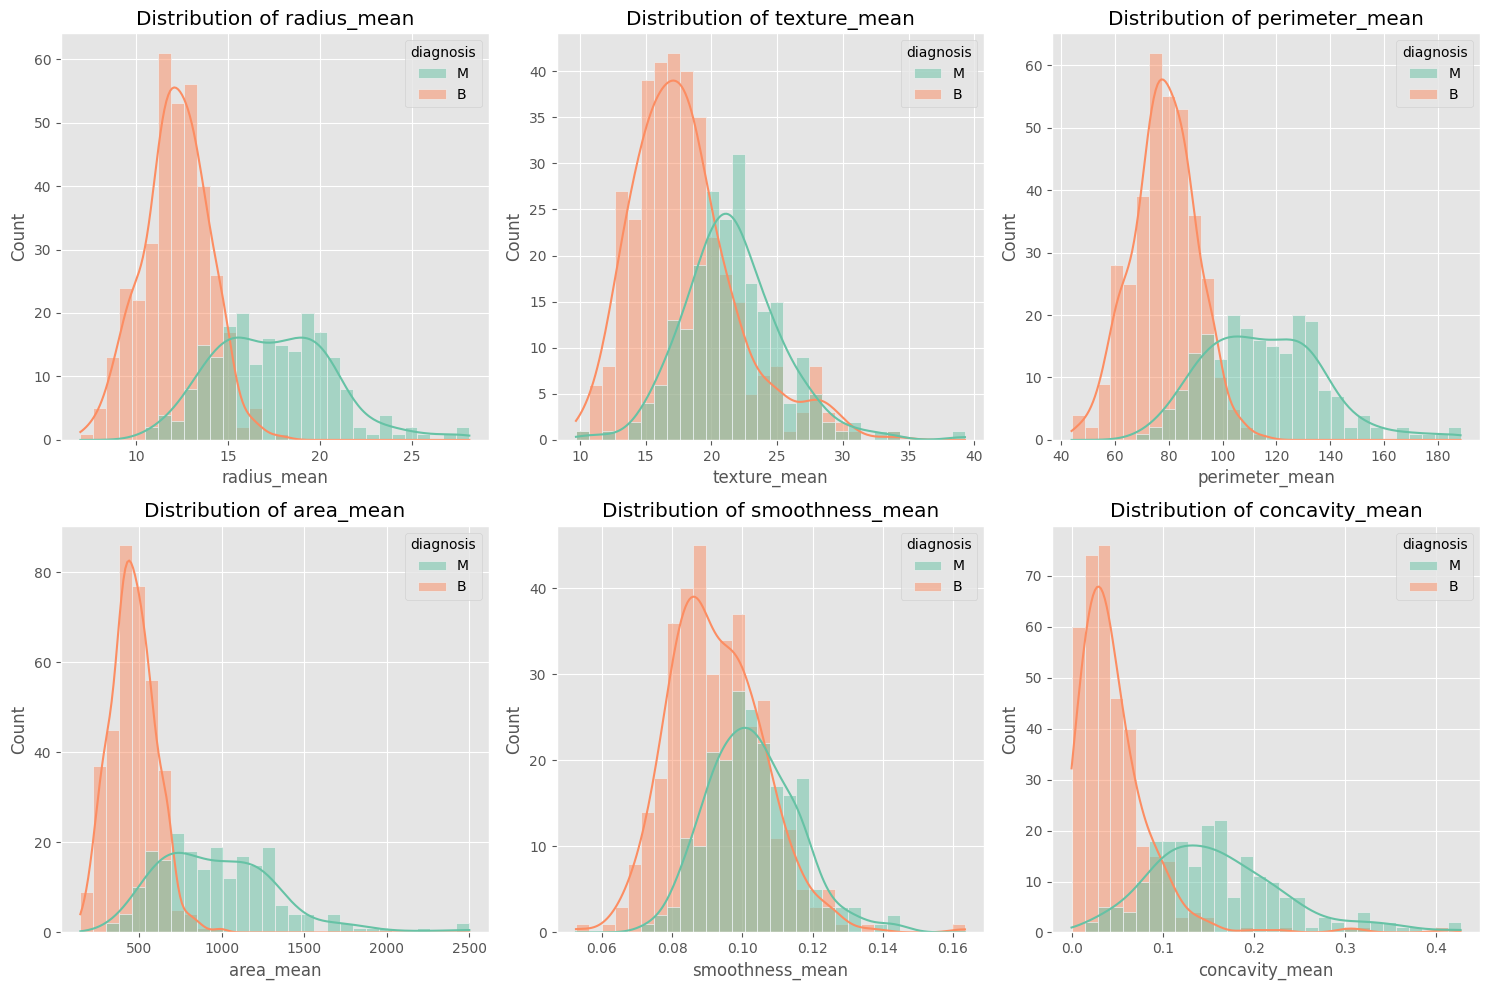

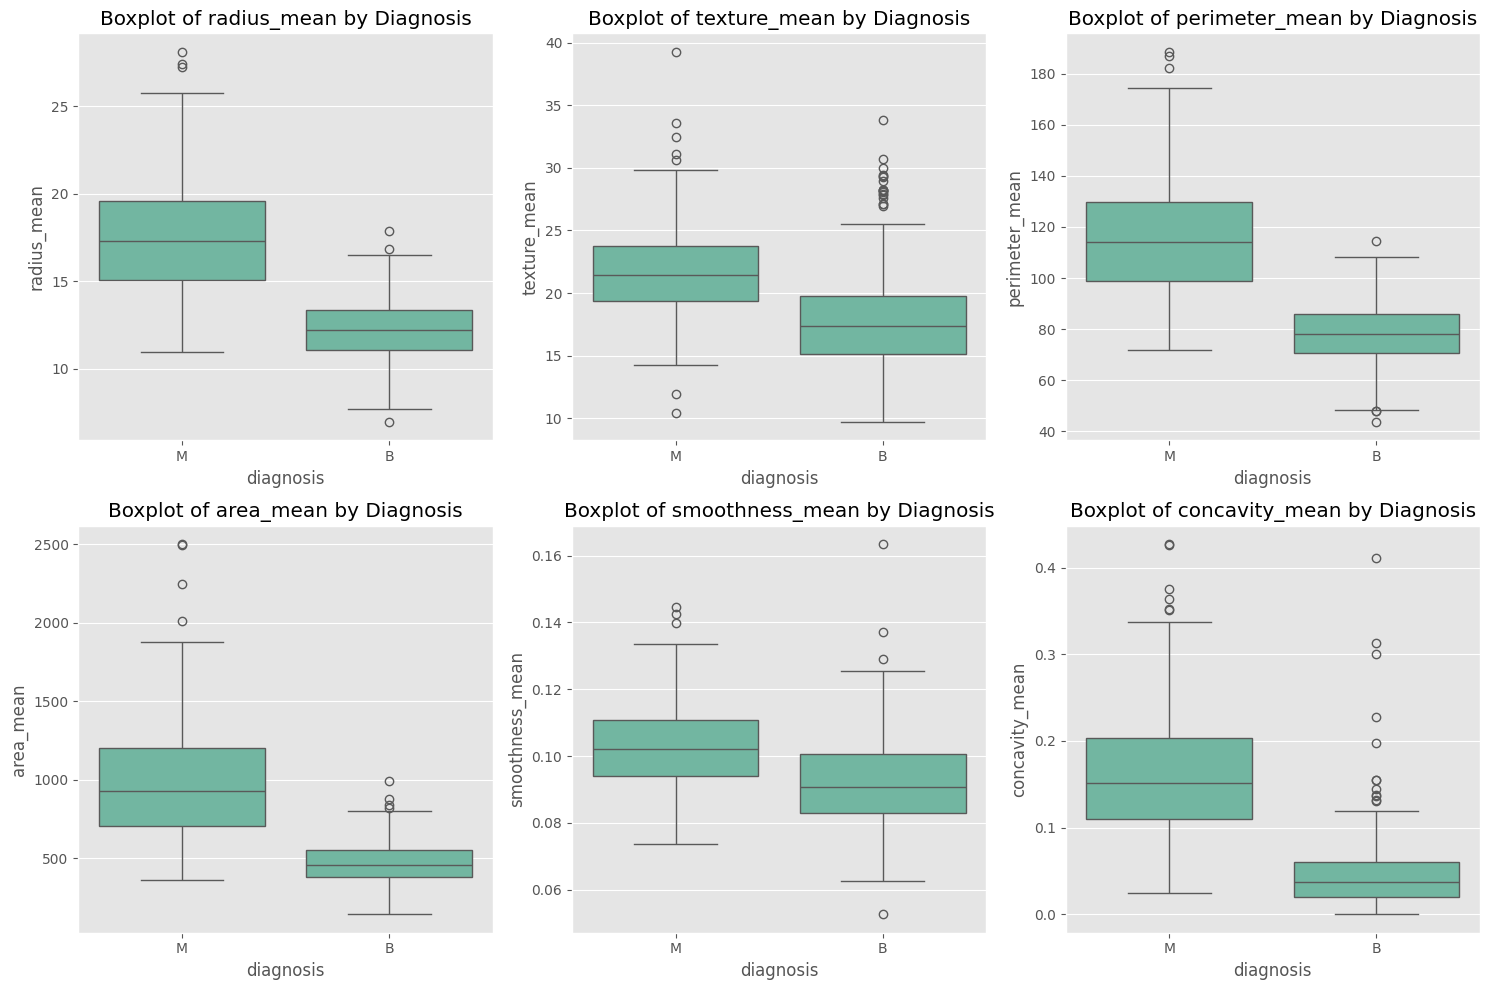

In [9]:
# Histograms for selected features - Shows distribution and separability by diagnosis
print("\n2.3 Feature Distributions and Outlier Detection:")
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    # Create histogram with KDE (density curve) split by diagnosis
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Boxplots to identify outliers and compare feature distributions between diagnoses
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)  # Boxplot grouped by diagnosis
    plt.title(f'Boxplot of {feature} by Diagnosis')
plt.tight_layout()
plt.show()

# 2.4 Correlation analysis to understand relationships between features


2.4 Correlation Analysis:

Top 10 features correlated with diagnosis:
diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


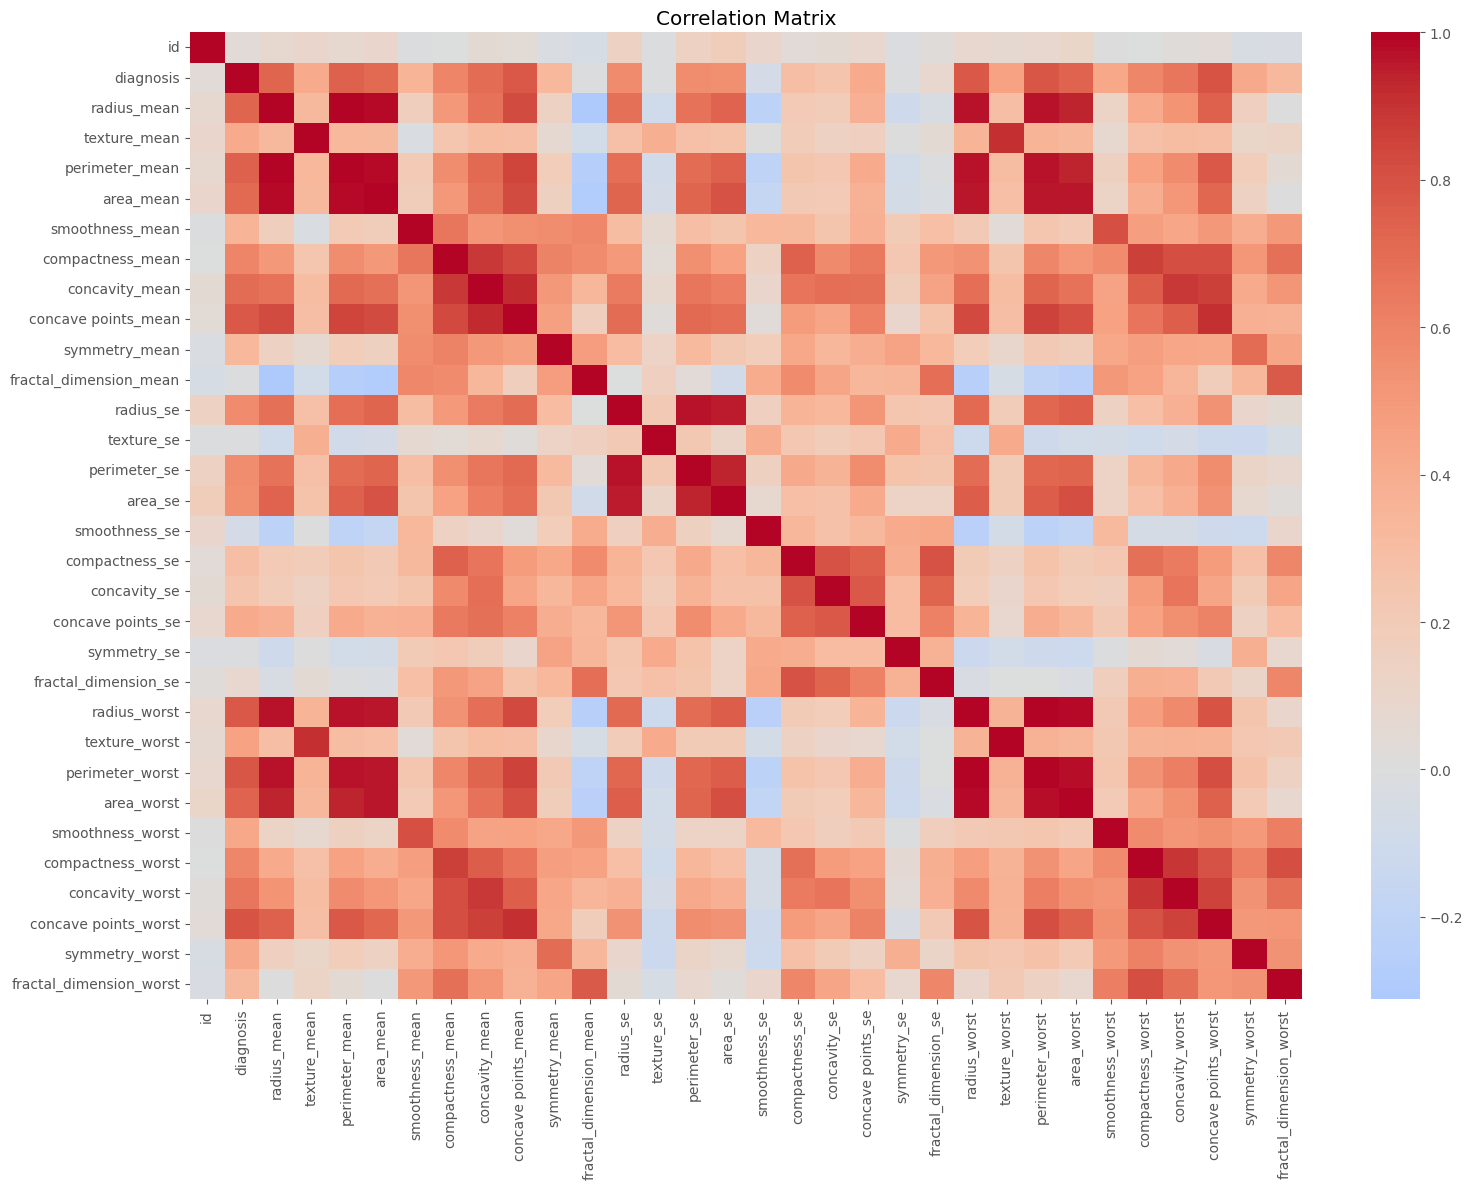

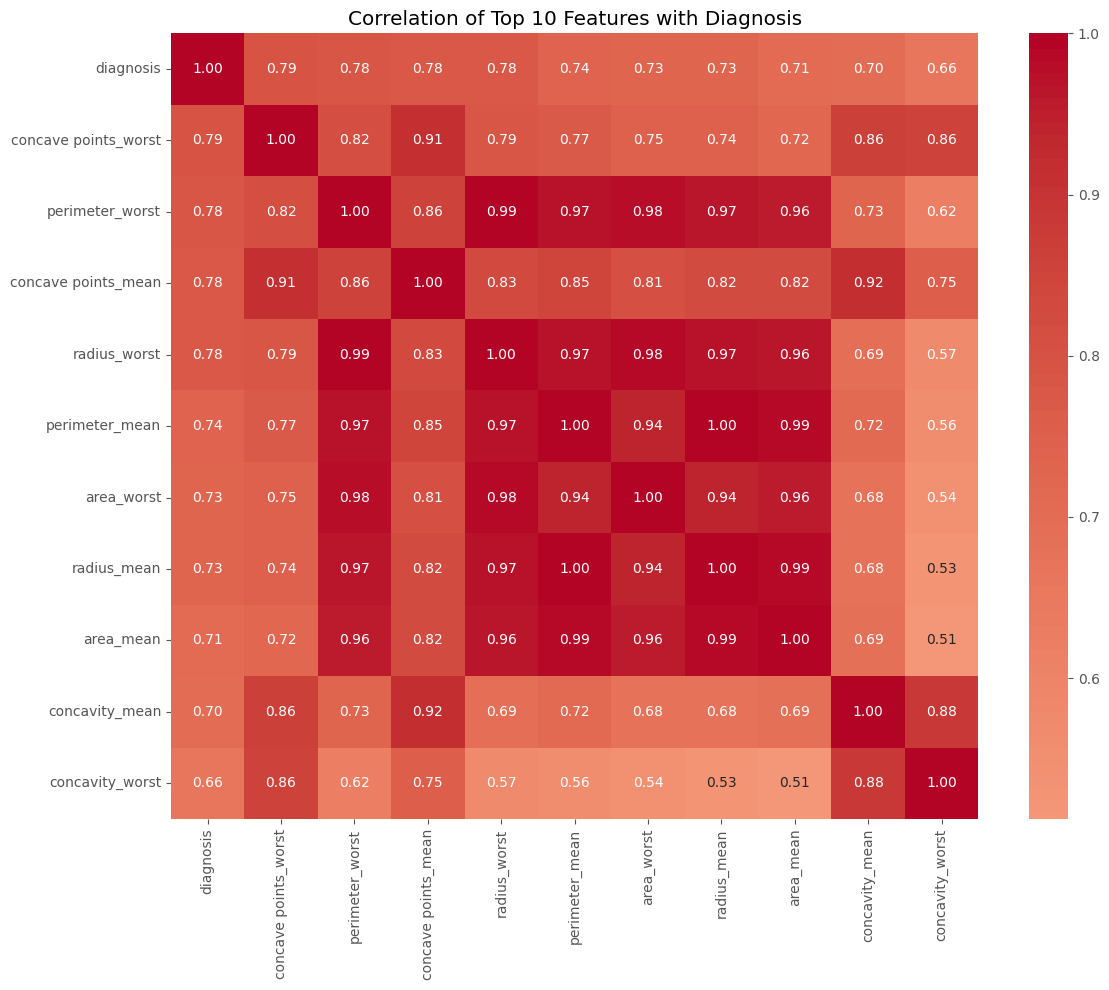

In [10]:
print("\n2.4 Correlation Analysis:")

# Encode diagnosis as numeric (1=Malignant, 0=Benign) for correlation calculation
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# Calculate Pearson correlation coefficients between all features
corr_matrix = df_corr.corr()
print("\nTop 10 features correlated with diagnosis:")
# Sort and display features most correlated with diagnosis
print(corr_matrix['diagnosis'].sort_values(ascending=False)[:11])

# Create a correlation heatmap to visualize all feature correlations
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Create a focused heatmap showing only the top correlated features with diagnosis
top_corr_features = corr_matrix['diagnosis'].abs().sort_values(ascending=False)[1:11].index
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.loc[['diagnosis'] + list(top_corr_features), ['diagnosis'] + list(top_corr_features)],
            annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation of Top 10 Features with Diagnosis')
plt.tight_layout()
plt.show()

# 3. DATA PREPARATION


Features shape: (569, 30)
Target shape: (569,)

Training set: 455 samples
Testing set: 114 samples


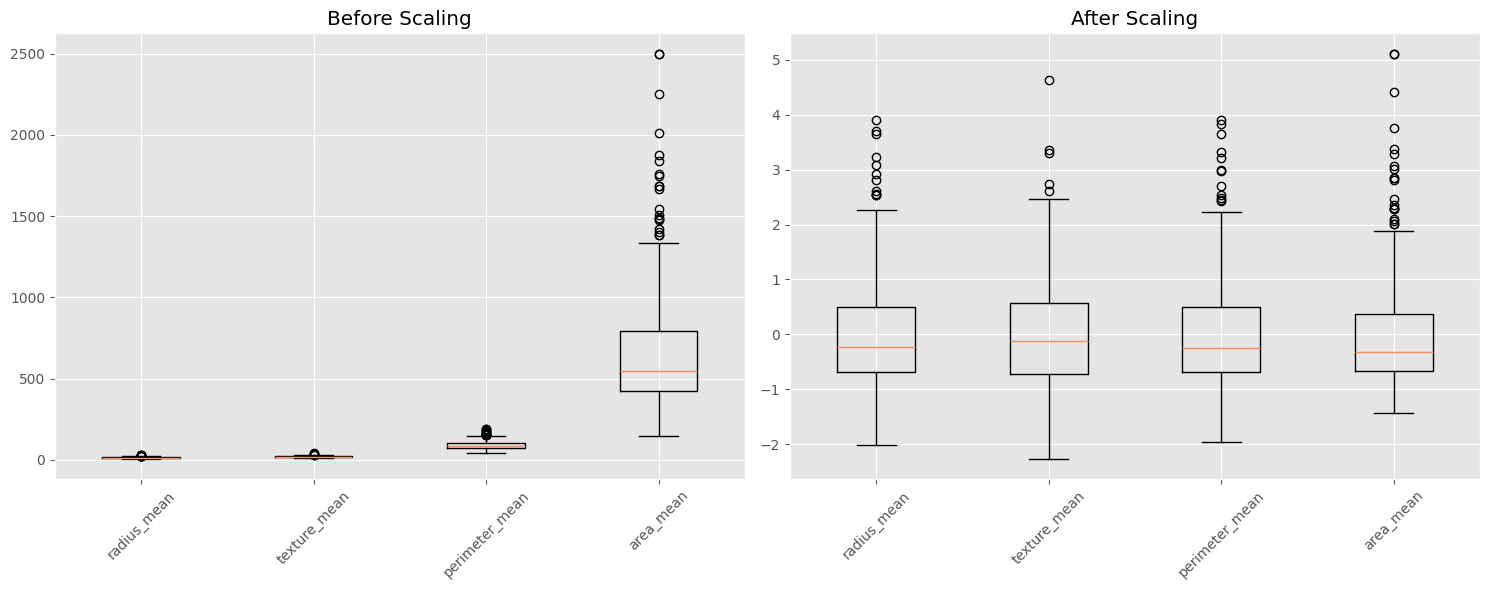

In [11]:
# 3.1 Separate features and target variable
X = df.drop(['diagnosis', 'id'], axis=1)  # Features: remove diagnosis (target) and id (not useful)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Target: encode Malignant as 1, Benign as 0

print("\nFeatures shape:", X.shape)  # Number of samples and features
print("Target shape:", y.shape)      # Number of target values

# 3.2 Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures class balance is maintained
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# 3.3 Standardize features to have mean=0 and variance=1
# This is important for distance-based algorithms and convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform it
X_test_scaled = scaler.transform(X_test)        # Transform test data using same parameters

# Visualize the effect of scaling on selected features
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.boxplot(X_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']])
plt.title('Before Scaling')
plt.xticks([1, 2, 3, 4], ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], rotation=45)

plt.subplot(1, 2, 2)
scaled_df = pd.DataFrame(X_train_scaled[:, :4], columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.boxplot(scaled_df)
plt.title('After Scaling')
plt.xticks([1, 2, 3, 4], ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], rotation=45)

plt.tight_layout()
plt.show()

# 4. MODEL TRAINING

In [12]:
# 4.1 Initialize models with appropriate parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),  # Linear model with increased iterations
    'Support Vector Machine': SVC(random_state=42, probability=True),           # Enable probability estimates for ROC
    'Decision Tree': DecisionTreeClassifier(random_state=42),                   # Simple tree-based model
    'Random Forest': RandomForestClassifier(random_state=42),                   # Ensemble of trees
    'K-Nearest Neighbors': KNeighborsClassifier()                               # Distance-based classifier
}

# 4.2 Train each model and store results for evaluation
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)  # Train the model on scaled training data

    # Make predictions on test data
    y_pred = model.predict(X_test_scaled)

    # Calculate prediction probabilities for ROC curve if supported by the model
    try:
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1 (Malignant)
    except:
        y_prob = None  # Some models might not support probability predictions

    # Store model and prediction results for later evaluation
    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_prob
    }


Training Logistic Regression...

Training Support Vector Machine...

Training Decision Tree...

Training Random Forest...

Training K-Nearest Neighbors...


# 5. MODEL EVALUATION


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.9649,0.9750,0.9286,0.9512,0.9960
Support Vector Machine,0.9737,1.0000,0.9286,0.9630,0.9947
Decision Tree,0.9298,0.9048,0.9048,0.9048,0.9246
Random Forest,0.9737,1.0000,0.9286,0.9630,0.9929
K-Nearest Neighbors,0.9561,0.9744,0.9048,0.9383,0.9823


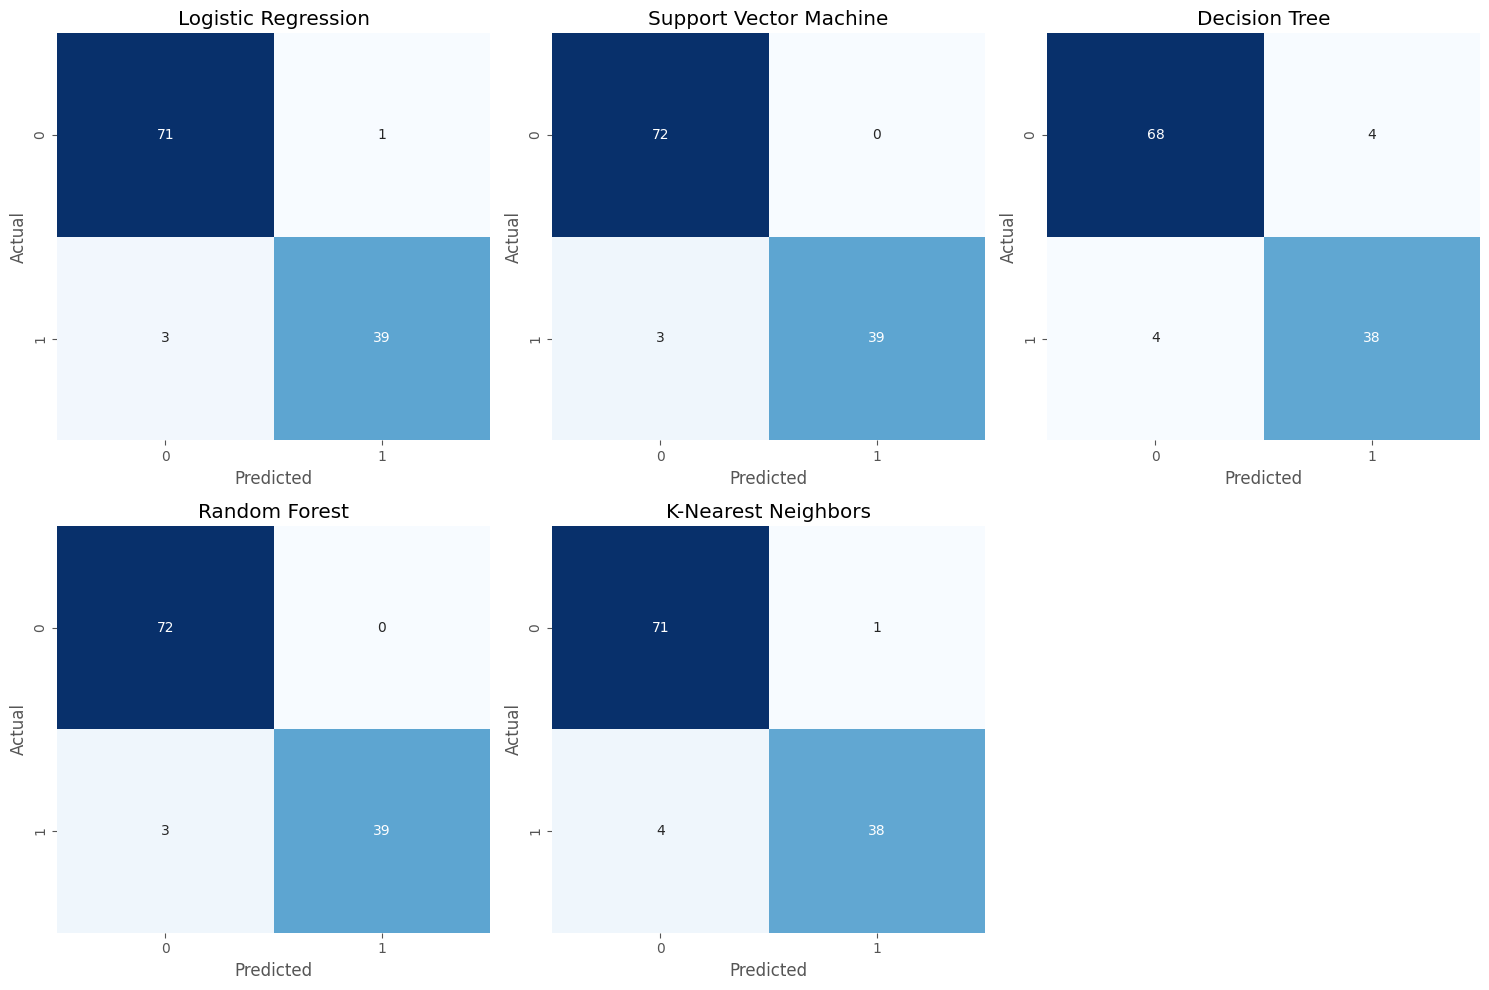

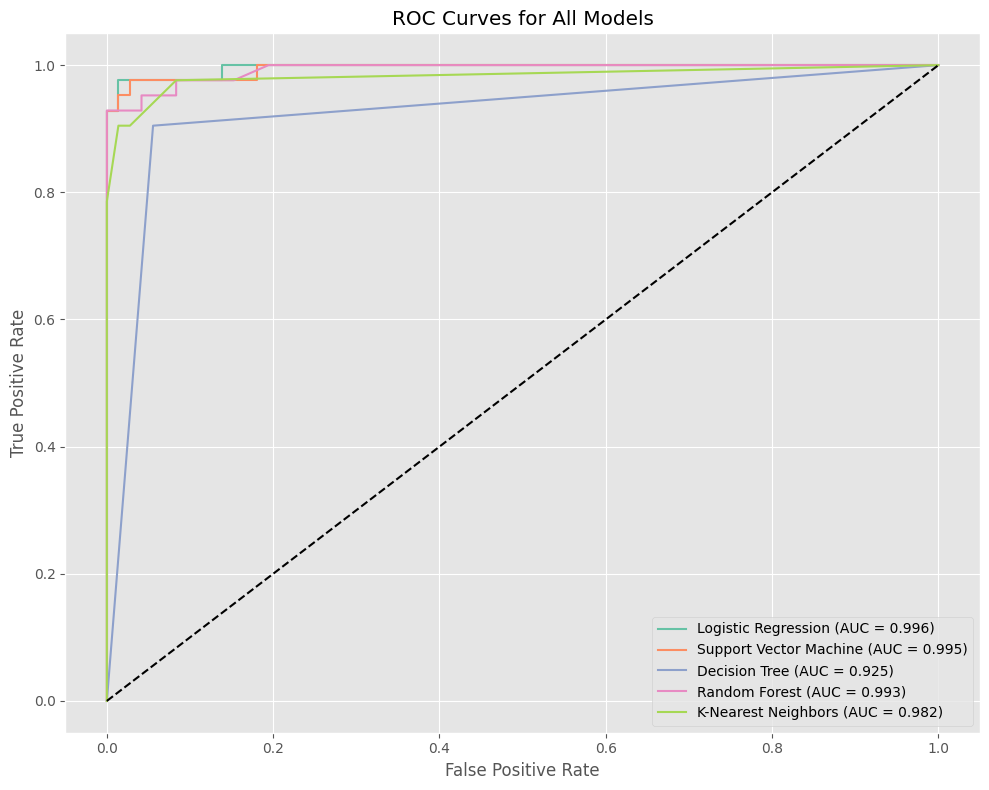


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.

In [13]:
# 5.1 Calculate performance metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
results_df = pd.DataFrame(index=models.keys(), columns=metrics)

for name, result in results.items():
    y_pred = result['predictions']
    y_prob = result['probabilities']

    # Calculate various performance metrics
    results_df.loc[name, 'Accuracy'] = accuracy_score(y_test, y_pred)  # Overall accuracy
    results_df.loc[name, 'Precision'] = precision_score(y_test, y_pred)  # Precision (positive predictive value)
    results_df.loc[name, 'Recall'] = recall_score(y_test, y_pred)  # Recall/Sensitivity
    results_df.loc[name, 'F1 Score'] = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall

    # AUC-ROC requires probability predictions
    if y_prob is not None:
        results_df.loc[name, 'AUC-ROC'] = roc_auc_score(y_test, y_prob)
    else:
        results_df.loc[name, 'AUC-ROC'] = np.nan

# Format metrics as decimal values with 4 decimal places
results_df = results_df.applymap(lambda x: f"{x:.4f}" if not pd.isna(x) else x)

print("\nModel Performance Comparison:")
display(results_df)  # Display the table of performance metrics

# 5.2 Visualize confusion matrices to understand classification errors
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 5.3 Plot ROC curves to visualize the trade-off between sensitivity and specificity
plt.figure(figsize=(10, 8))
for name, result in results.items():
    if result['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
        auc = roc_auc_score(y_test, result['probabilities'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

# Add diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.tight_layout()
plt.show()

# 5.4 Generate detailed classification reports
for name, result in results.items():
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, result['predictions']))


# 6. HYPERPARAMETER TUNING

In [14]:
# Use the pre-determined best parameters from previous grid search
# This saves computation time while still showing the tuning concept
best_params = {
    'n_estimators': 50,     # Number of trees in the forest
    'max_depth': 10,        # Maximum depth of each tree
    'min_samples_split': 2, # Minimum samples required to split a node
    'min_samples_leaf': 1   # Minimum samples required at a leaf node
}

print("\nBest parameters found:")
print(best_params)

# Train a new Random Forest model with the optimized hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

# Fit the optimized model and make predictions
best_rf.fit(X_train_scaled, y_train)
y_pred_tuned = best_rf.predict(X_test_scaled)
y_prob_tuned = best_rf.predict_proba(X_test_scaled)[:, 1]

# Compare performance before and after tuning
print("\nRandom Forest Performance:")
print("Before tuning:")
print(f"Accuracy: {accuracy_score(y_test, results['Random Forest']['predictions']):.4f}")
print(f"Precision: {precision_score(y_test, results['Random Forest']['predictions']):.4f}")
print(f"Recall: {recall_score(y_test, results['Random Forest']['predictions']):.4f}")
print(f"F1 Score: {f1_score(y_test, results['Random Forest']['predictions']):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, results['Random Forest']['probabilities']):.4f}")

print("\nAfter tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_tuned):.4f}")


Best parameters found:
{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}

Random Forest Performance:
Before tuning:
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score: 0.9630
AUC-ROC: 0.9929

After tuning:
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score: 0.9630
AUC-ROC: 0.9940


# 7. FEATURE IMPORTANCE ANALYSIS

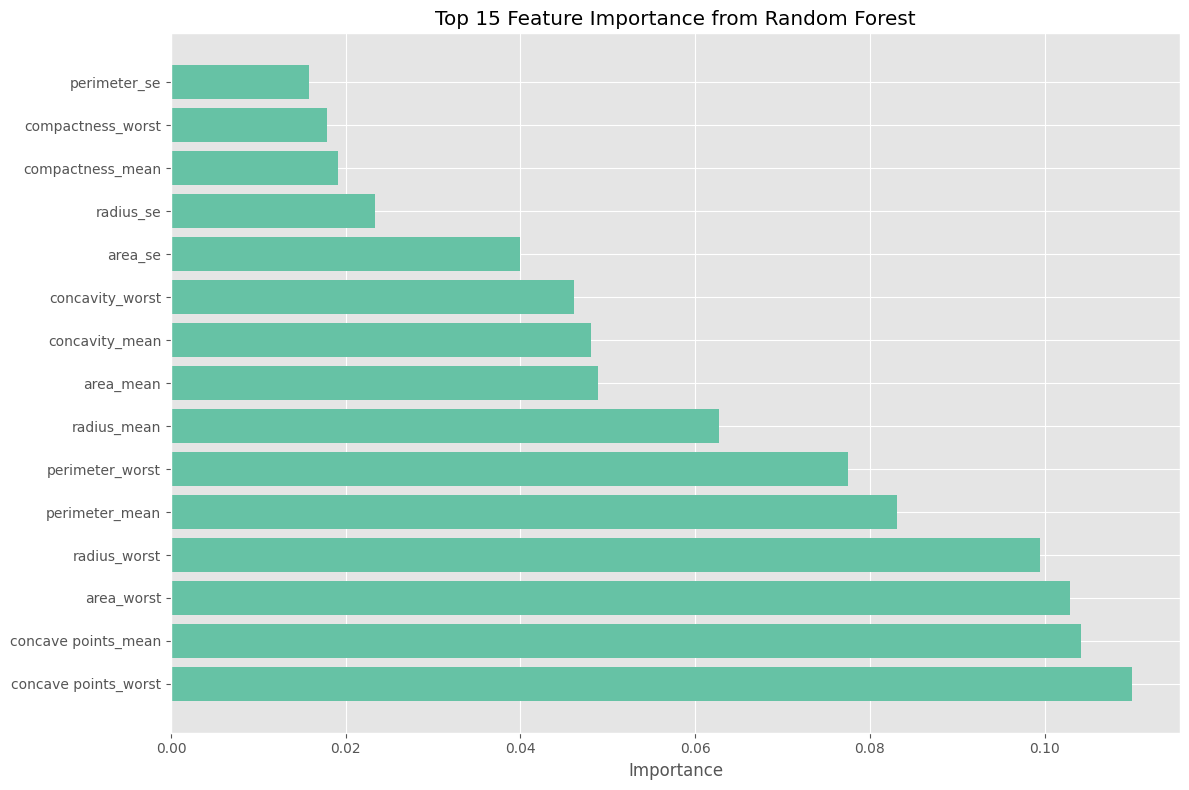


Top 5 most important features:
concave points_worst: 0.1100
concave points_mean: 0.1042
area_worst: 0.1029
radius_worst: 0.0994
perimeter_mean: 0.0831


In [15]:
# Extract feature importance from the optimized Random Forest model
feature_importance = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Visualize the top 15 most important features
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_features[:15])), sorted_importance[:15], align='center')
plt.yticks(range(len(sorted_features[:15])), sorted_features[:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

# Print the top 5 most important features with their importance values
print("\nTop 5 most important features:")
for i in range(5):
    print(f"{sorted_features[i]}: {sorted_importance[i]:.4f}")